# トヨタ自動車 (``7203``) １分足

### システムパスに一つ上のディレクトリ ``..`` を追加

In [10]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

## ライブラリのインポート

In [11]:
import re

from matplotlib import (
    font_manager as fm,
    pyplot as plt,
)
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar

## yfinance で OHLC データを読み込む

In [12]:
symbol = '7203.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='1d', interval='1m')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-03-25 09:04:00+09:00,2942.0,2942.0,2942.0,2942.0,0,0.0,0.0
2025-03-25 09:05:00+09:00,2941.5,2946.0,2938.0,2942.0,302600,0.0,0.0
2025-03-25 09:06:00+09:00,2941.5,2941.5,2933.0,2936.0,209800,0.0,0.0
2025-03-25 09:07:00+09:00,2935.5,2936.5,2926.0,2936.5,352800,0.0,0.0
2025-03-25 09:08:00+09:00,2936.5,2938.0,2930.0,2931.5,131200,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-25 11:25:00+09:00,2887.5,2888.0,2886.5,2888.0,53400,0.0,0.0
2025-03-25 11:26:00+09:00,2887.5,2888.0,2887.0,2888.0,29600,0.0,0.0
2025-03-25 11:27:00+09:00,2888.0,2888.5,2887.5,2888.0,28100,0.0,0.0


## チャート

### フォントの設定

In [13]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

### mplfinance でプロット

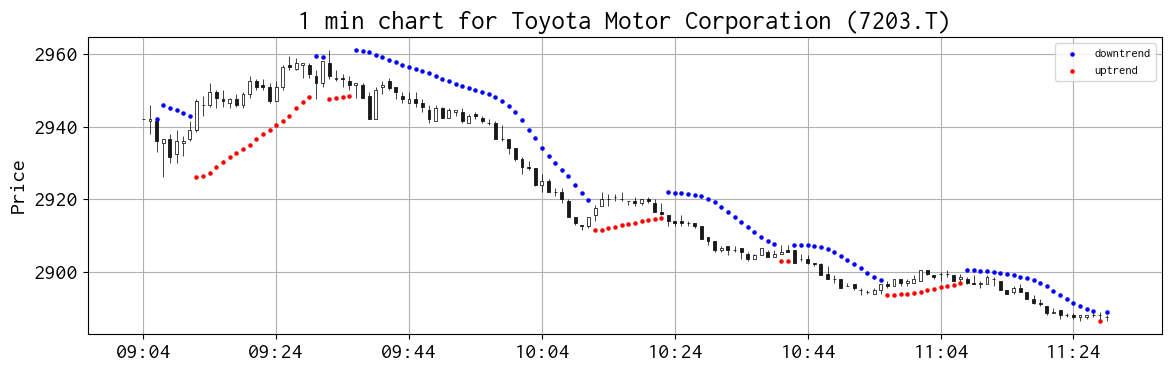

In [14]:
dict_psar = psar(df)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)

apds  = [
    mpf.make_addplot(dict_psar['bear'], type='scatter', marker='o', markersize=5, color='blue', label='downtrend', ax=ax),
    mpf.make_addplot(dict_psar['bull'], type='scatter', marker='o', markersize=5, color='red', label='uptrend', ax=ax),
] 
mpf.plot(df, type='candle', style='default', volume=False, datetime_format='%H:%M', addplot=apds, xrotation=0, ax=ax,)

ax.grid()
ax.legend(fontsize=9)

try:
    ax.set_title('1 min chart for %s (%s)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('1 min chart for %s' % symbol)

plt.tight_layout()

pattern = re.compile(r'(.+)\.T')
m = pattern.match(symbol)
if m:
    plt.savefig('report_1m_chart_%s.png' % m.group(1))
else:
    plt.savefig('report_1m_chart_%s.png' % symbol)

plt.show()